In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Đề bài 1

## Bài 1

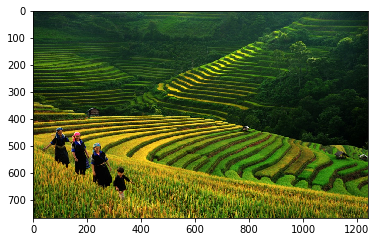

In [2]:
I = cv2.imread("GreenVietnam.png")
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
plt.imshow(I)

In [3]:
kernel = np.asarray([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
print(kernel)

[[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]


In [4]:
# 1.1 S = I * kernel với * là phép toán tích chập
def convolution(image, kernel):
    image = image
    kernel = kernel
    k_h, k_w = kernel.shape
    pad = (k_h - 1) // 2
    image_padded = np.zeros((image.shape[0] + (k_h - 1), image.shape[1] + (k_w - 1)))
    image_padded[1:-1, 1:-1] = image
    out = np.zeros_like(image)
    for y in range(pad, image.shape[0] + pad):
        for x in range(pad, image.shape[1] + pad):
            out[y - pad, x - pad] = (kernel * image_padded[y - pad:y + pad + 1, x - pad:x + pad + 1]).sum()
            out[y - pad, x - pad] = np.clip(out[y - pad, x - pad], 0, 255)
            
    return out

Sr = convolution(I[:, :, 0], kernel)
Sg = convolution(I[:, :, 1], kernel)
Sb = convolution(I[:, :, 2], kernel)

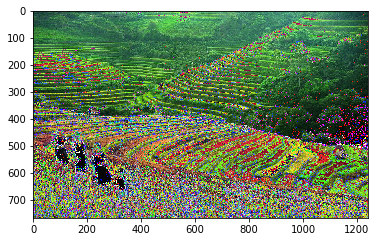

In [6]:
# 1,2 Sb = Sb + Ib
# 1.3
Sr = Sr.astype('uint8')
Sg = Sg.astype('uint8')
Sb = Sb.astype('uint8')

S = np.stack([Sr, Sg, Sb], axis=2)
S = np.clip(S + I, 0, 255)
plt.imshow(S)

## Bài 3